### Voltaje Umbral(threshold) para una estructura
#### **Polisilicio-Óxido-Semiconductor**

### **Librerías**

In [3]:
import numpy as np


### **Constantes**

In [4]:
 # Constante de Boltzman
k = 8.62e-10

# Carga del electrón
q = 1.6e-19

# Permitividad eléctrca del vacío
E_o = 8.86e-1

# Constante dieléctrica del sílicio
k_si = 11.7

# Temperatura
T = 300

# Carga fija + carga superficial, en la interfaz SiO2 - Si Q=Q_fc + Q_ss
Q = 5e10

# Concentración del Sustrato
N_B = np.linspace(1e14, 5e18 + 5e14, 1000)


# Grosor del SiO2(um); 1nm - 50nm
X_o = np.linspace(0.001, 0.05 + 0.005, 1000)

# Constante dieléctrica del óxido
K_o = np.linspace(4, 20 + 1, 1000)

# Ancho de banda prohibida del Silicio
Delta_E_G = 1.1

# Dopaje del polisilicio
N_Bp = np.linspace(1e19, 1e22 + 5e19, 1000)

# Función trabajo del Metal
Phi_m = np.linspace(3,5, 1000)



### **Funciones**

In [5]:
# Potencial de Fermi del sustrato

Phi_f = k*T*np.log(N_B / 1.45e10)

In [6]:
# Capacidad del dieléctrico

C_o = (K_o*E_o/X_o)*1e4

In [7]:
# Función trabajo del Silicio tipo-p

Phi_sip = (4.15 + Delta_E_G/2) + Phi_f

In [8]:
# }función trabajo del Silicio tipo-n

Phi_sin = (4.15 + Delta_E_G/2) - Phi_f

In [9]:
# Potencial de Fermi poli-silicio

Phi_fpoli = k*T*np.log(N_Bp / 1.45e10)

In [10]:

Phi_poli_n = (4.15 + Delta_E_G/2) - Phi_fpoli

In [11]:

Phi_poli_p = (4.15 + Delta_E_G/2) + Phi_fpoli

### **Gráficas**

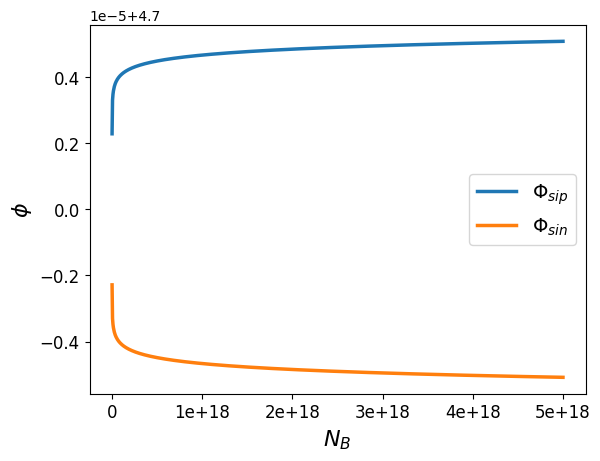

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


plt.plot(N_B, Phi_sip, label='Phi_sip', linewidth=2.5)
plt.plot(N_B, Phi_sin, label='Phi_sin', linewidth=2.5)

greek_letters = [r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$', r'$\zeta$', r'$\eta$', r'$\theta$', r'$\iota$', r'$\kappa$']

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:g}'.format(x)))
plt.gca().xaxis.set_minor_formatter(ticker.FuncFormatter(lambda x, _: '{:g}'.format(x)))

plt.ylabel(r'$\phi$', size=16)
plt.xlabel(r'$N_{B}$', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
legend_labels = [r'$\Phi_{sip}$', r'$\Phi_{sin}$']
plt.legend(legend_labels, loc='center right', fontsize=14)
plt.show()

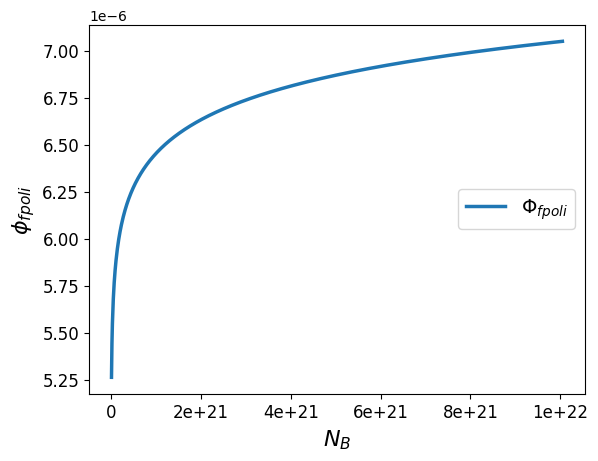

In [18]:
plt.plot(N_Bp, Phi_fpoli, label='Phi_fpoli', linewidth=2.5)
greek_letters = [r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$', r'$\zeta$', r'$\eta$', r'$\theta$', r'$\iota$', r'$\kappa$']

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:g}'.format(x)))
plt.gca().xaxis.set_minor_formatter(ticker.FuncFormatter(lambda x, _: '{:g}'.format(x)))

plt.ylabel(r'$\phi_{fpoli}$', size=16)
plt.xlabel(r'$N_{B}$', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
legend_labels = [r'$\Phi_{fpoli}$', r'$\Phi_{fpoli}$']
plt.legend(legend_labels, loc='center right', fontsize=14)
plt.show()

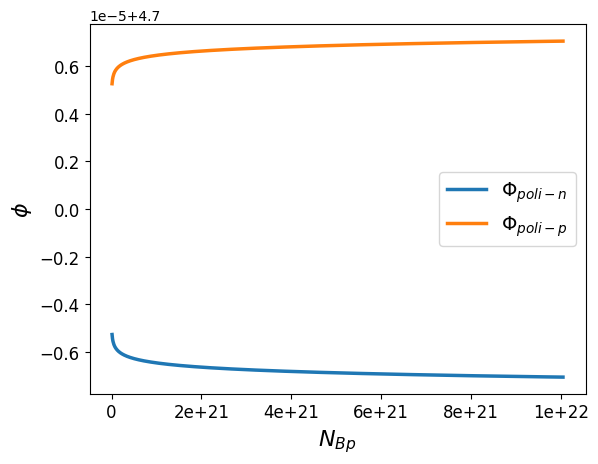

In [20]:
plt.plot(N_Bp, Phi_poli_n, label='Phi_poli_n', linewidth=2.5)
plt.plot(N_Bp, Phi_poli_p, label='Phi_poli_p', linewidth=2.5)

greek_letters = [r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$', r'$\zeta$', r'$\eta$', r'$\theta$', r'$\iota$', r'$\kappa$']

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:g}'.format(x)))
plt.gca().xaxis.set_minor_formatter(ticker.FuncFormatter(lambda x, _: '{:g}'.format(x)))

plt.ylabel(r'$\phi$', size=16)
plt.xlabel(r'$N_{Bp}$', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
legend_labels = [r'$\Phi_{poli-n}$', r'$\Phi_{poli-p}$']
plt.legend(legend_labels, loc='center right', fontsize=14)
plt.show()

### **Diferencia entre las funciones de trabajo**

In [21]:
# Poli tipo-n-Sustrato tipo-p

Phi_poli_n_sip = Phi_poli_n - Phi_sip

# Poli tipo-p-Sustrato tipo-p

Phi_poli_p_sip = Phi_poli_p - Phi_sip

Phi_M_sip = Phi_m - Phi_sip

### **Voltaje de Banda Plana**

In [22]:
V_FB_polin_Sip = Phi_poli_n_sip - (Q*q/C_o)

V_FB_polip_Sip = Phi_poli_p_sip - (Q*q/C_o)

V_FBM_sip = Phi_M_sip - (Q*q/C_o)

### **Substrato N canal p**

In [23]:
Phi_polin_Sin = Phi_poli_n - Phi_sin

Phi_polip_Sin = Phi_poli_p - Phi_sin

In [25]:
Phi_M_Sin = Phi_m - Phi_sin


V_FB_polin_Sin = Phi_polin_Sin - (Q*q/C_o)


V_FB_polip_Sin = Phi_polip_Sin - (Q*q/C_o)

V_FBM_Sin = Phi_M_Sin - (Q*q/C_o)



### **Gráficas**

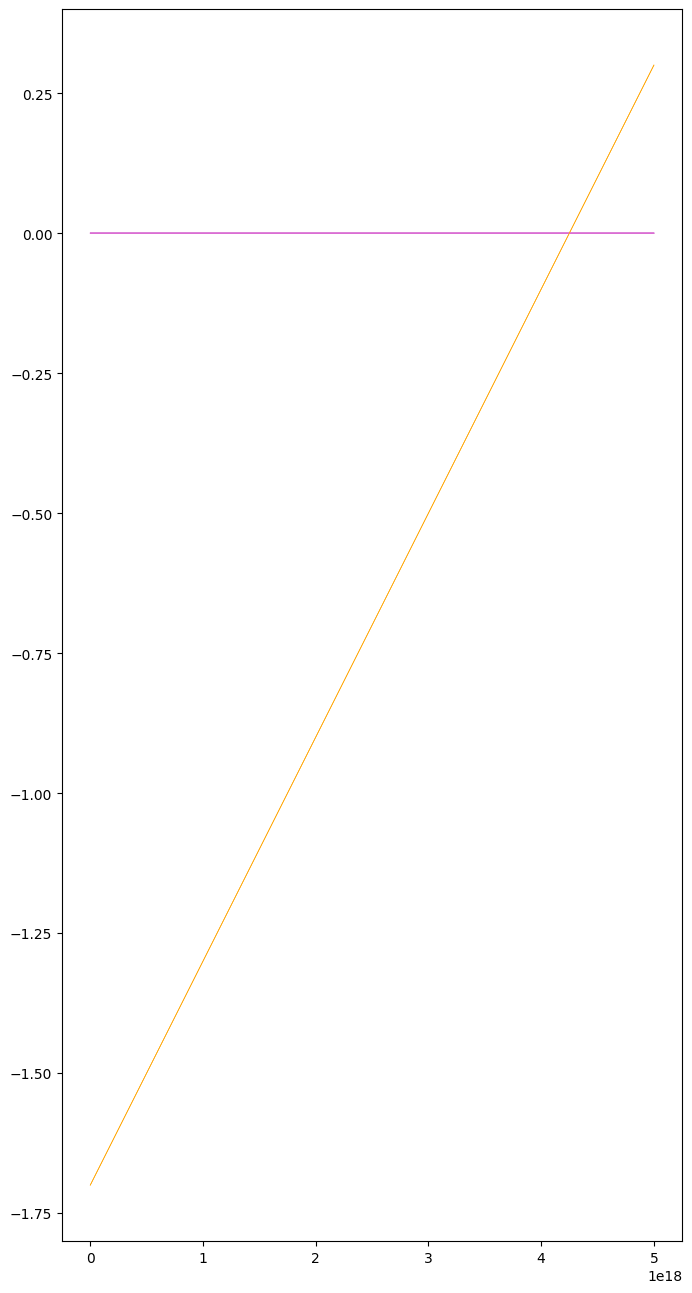

In [26]:
plt.figure(figsize=(8, 16))  # Ancho x Alto


plt.plot(N_B, V_FB_polip_Sip, label='V_FB_polip_Sip', linewidth=0.5, color='red')
plt.plot(N_B, V_FB_polin_Sip, label='V_FB_polin_Sip', linewidth=0.5, color='Blue')
plt.plot(N_B, V_FBM_sip, label='V_FBM_sip', linewidth=0.5, color='orange')
plt.plot(N_B, V_FB_polip_Sin, label='V_FB_polip_Sin', linewidth=0.5, color='magenta')
plt.plot(N_B, V_FB_polin_Sin, label='V_FB_polip_Sin', linewidth=0.5, color='pink')
plt.plot(N_B, V_FBM_Sin, label='V_FBM_sip', linewidth=0.5, color='orange')
plt.show()

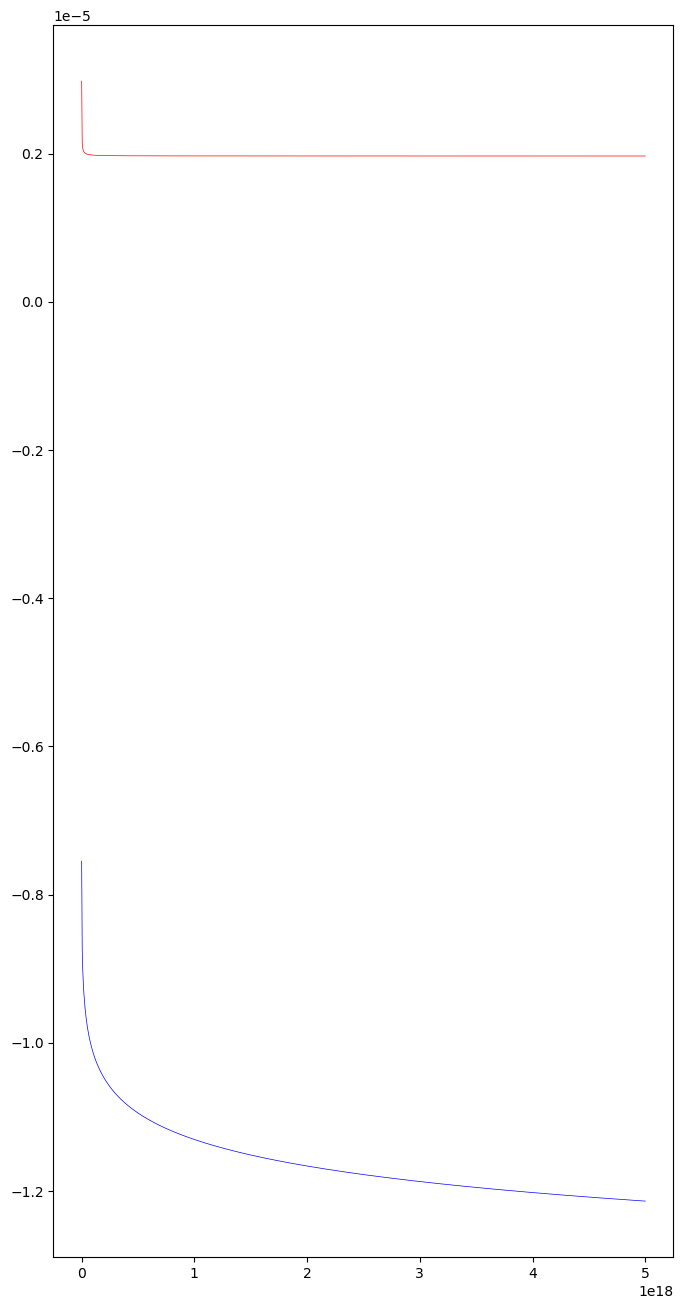

In [ ]:
plt.figure(figsize=(8, 16))  # Ancho x Alto


plt.plot(N_B, V_FB_polip_Sip, label='V_FB_polip_Sip', linewidth=0.5, color='red')

plt.plot(N_B, V_FB_polin_Sip, label='V_FB_polin_Sip', linewidth=0.5, color='Blue')

#plt.plot(N_B, V_FBM_sip, label='V_FB_polip_Sin', linewidth=0.5, color='magenta')

plt.show()

### **Carga por unidad de área**

### Substrato tipo P(canal N)
### Aceptores carga negativa

In [ ]:
Q_Bp = -np.sqrt(2*q*k_si*E_o*N_B) * np.sqrt(2*Phi_f)

### Substrato tipo N(canal P)
### Donores, carga positiva

In [ ]:
Q_B = np.sqrt(2*q*k_si*E_o*N_B) * np.sqrt(2*Phi_f)

EL voltaje total que hace falta aplicar al semiconductor para alcanzar la condición de inversión n fuerte es igual a 2Fif,(dos veces el nivel de fermi) + el voltaje que cae en la zona de empobrecimiento, que seá la carga total de empobrecimiento entre la capacitancia del dieléctrico

### **Voltaje de Threshold subs P, CANAL N QB<0, Fif>0:**

In [ ]:
#
VTpolin_Sip = V_FB_polin_Sip - (Q_Bp/C_o) + 2*Phi_f

#
VTpolip_Sip = V_FB_polip_Sip - (Q_Bp/C_o) + 2*Phi_f

#
VTM_Sip = V_FBM_sip - (Q_Bp/C_o) + 2*Phi_f

### **Voltaje umbral sub N canal P, Qb>0 Fif>0**

In [ ]:
#
VTpolin_Sin = V_FB_polin_Sin - (Q_Bp/C_o) - 2*Phi_f

#
VTpolip_Sin = V_FB_polip_Sin - (Q_Bp/C_o) - 2*Phi_f

#
VTM_Sin = V_FBM_Sin - (Q_Bp/C_o) - 2*Phi_f
